# Estatística - Teste de Hipóteses


> Nome aluna: ANA LUISA FUCHS DA SILVEIRA



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Considerando a base de dados experimento_test_ab.csv responda as questões abaixo:

### 1. Qual dos cenários tem a maior taxa de conversão?

Taxa de conversão = conversão / visualização

In [ ]:
df_ab = pd.read_csv('experimento_teste_ab.csv')

In [ ]:
df_ab.head(5)

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [ ]:
df_taxa = df_ab[['Conversões', 'Visualizações', 'Versão_Página']].groupby('Versão_Página').sum()

In [ ]:
df_taxa

,Conversões,Visualizações
Versão_Página,,
A,105,150835
B,125,150676


In [ ]:
df_taxa['taxa_de_conversão'] = df_taxa['Conversões'] / df_taxa['Visualizações']

In [ ]:
print(f'A taxa de conversão do grupo A é: {df_taxa["taxa_de_conversão"][0] * 100:.3f}%\n',
      f'A taxa de conversão do grupo B é: {df_taxa["taxa_de_conversão"][1] * 100:.3f}%')

A taxa de conversão do grupo A é: 0.070%
 A taxa de conversão do grupo B é: 0.083%


In [ ]:
if df_taxa['taxa_de_conversão'][0] > df_taxa['taxa_de_conversão'][1]:
    print(f'A maior taxa de conversão pertence ao grupo {df_taxa.index[0]}, sendo {df_taxa["taxa_de_conversão"][0] * 100:.3f}%')
elif df_taxa['taxa_de_conversão'][0] < df_taxa['taxa_de_conversão'][1]:
    print(f'A maior taxa de conversão pertence ao grupo {df_taxa.index[1]}, sendo {df_taxa["taxa_de_conversão"][1] * 100:.3f}%')

A maior taxa de conversão pertence ao grupo B, sendo 0.083%


### 2.	Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

a.	O cenário A, da base, como o inicial, que funciona hoje.

b.	Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).

c.	Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.

d.	O aumento para 10% de conversão.


In [ ]:
#Cenário A, da base, como o atual:

df_a = df_ab[df_ab['Versão_Página'] == 'A']

**Para calcular a amostragem de  um teste A/B, necessitaremos dos seguintes parâmetros:**

Nível de significancia (ɑ):
- Nos dá a Probabilidade de um evento ocorrer de modo aleatório.
- Ou seja se selecionarmos 5%, significa que. queremos que com 95% de certeza o grupo A difere do B e 5% de chance essa
diferença é aleatória.
- Encontramos na Distribuição normal padrão os valores críticos Z para alpha. Para 5% eles serão :-1.96 e 1.96


In [ ]:
alpha = 0.05

Poder do teste (1 - 𝛃):
- 𝛃 nos dá a probabilidade de o teste não encontrar diferença nas campanhas mesmo que ela exista
- 1- 𝛃 Nos dá a probabilidade de o meu teste A/B encontrar de fato uma diferença entre teste e controle, dado que elas são
diferentes.
- Selecionado de 0 a 100%, geralmente selecionamos 𝛃 = 20%

In [ ]:
#80% de CERTEZA do teste ser preciso, portanto a certeza é 0.8 de conseguir e o beta é 1 - 0.8 = 0.2
poder_teste = 0.8
beta = 1 - poder_teste

Encontrando os valores de Z:

In [ ]:
# Encontrando os valores Z
z_alpha = abs(stats.norm.ppf(alpha/2))
z_beta = abs(stats.norm.ppf(beta))

In [ ]:
z_alpha #dividi alfa por 2 para se tornar semelhante ao valor tabelado utilizado no final

1.9599639845400545

In [ ]:
z_beta

0.8416212335729143

Delta (Δ):
- Será a diferença entre médias ou proporções das métricas dos dois grupos.
- Exemplo:
- Grupo de controle A (utilizando o botão atual ) tem taxa de conversão de 0.069%
- Como queremos um aumento de 10% de conversão para o grupo B (tratamento). CTR2 = 0.069*(1+0.1) = 0.076
- Delta = 0.076 - 0.069


In [ ]:
#DELTA = diferença entre as métricas. Taxa de conversão ideal (10% acima da atual) - taxa de conversão
taxa_atual = df_taxa['taxa_de_conversão'][0] * 100
taxa_esperada = taxa_atual * 1.10   #Taxa esperada é 10% de aumento ou 10% de conversão??
delta = taxa_esperada - taxa_atual
delta

0.00696124904697186

In [ ]:
taxa_atual

0.0006961249046971857

In [ ]:
taxa_esperada

0.0007657373951669042

Variância:
* A variância amostral (do grupo A)
* Define-se pelo quadrado do meu desvio padrão

In [ ]:
variancia_amostral_A = df_a['Conversões'].std() * df_a['Conversões'].std()
variancia_amostral_A

0.09406906906906905

Cálculo amostral:
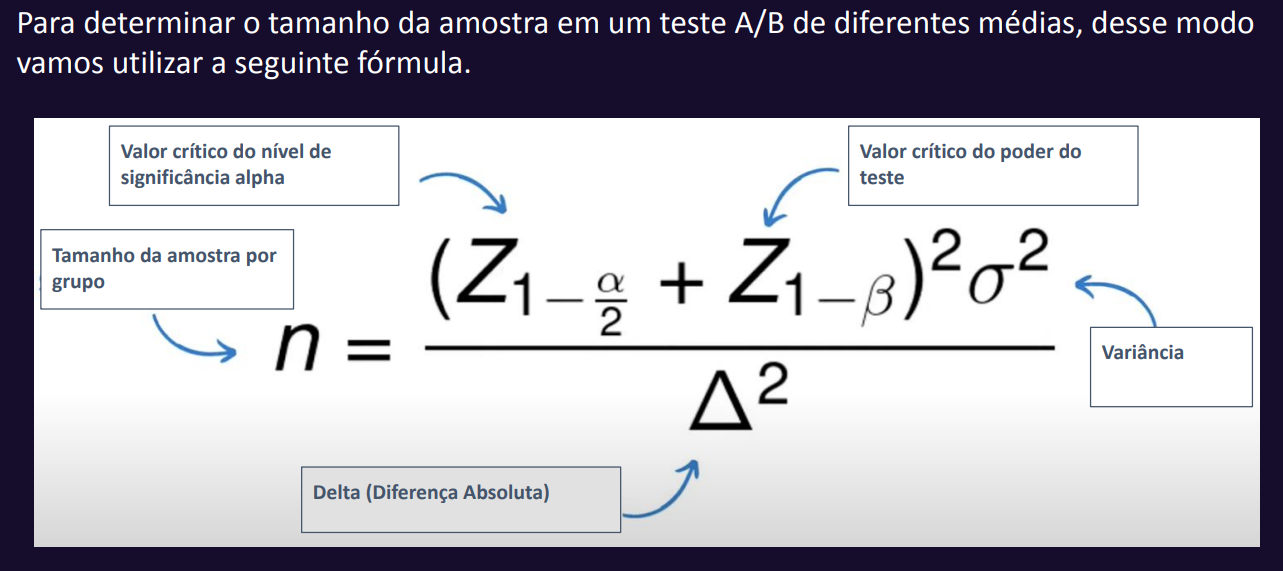

In [ ]:
#Utilizando a fórmula do slide
n = ((z_alpha + z_beta)**2  * (variancia_amostral_A **2)) / (delta ** 2)
n

1433.2667438337985

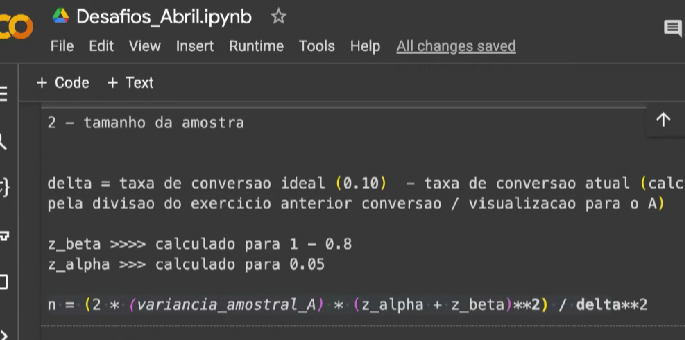

In [ ]:
#Testando a fórmula dada em aula experimental
amostra = (2 * (variancia_amostral_A ) * (z_alpha + z_beta)**2 ) / delta**2
amostra

30472.646493002718

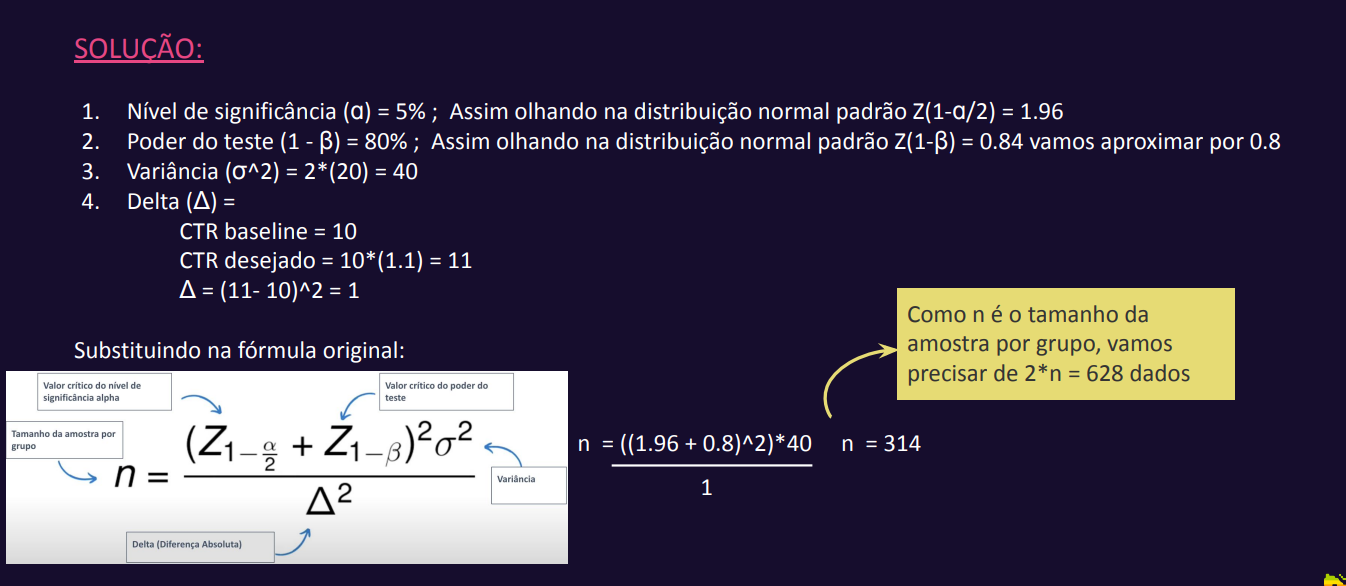

In [ ]:
# Testando o exemplo conforme o slide em aula

n1 = (((1.96 + 0.8)**2) * (variancia_amostral_A**2)) / delta**2
n1

1391.0332579116503

## Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:

In [ ]:
df = pd.read_csv('pacientes.csv')

In [ ]:
df_original = df.copy()

#### 3.	Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

In [ ]:
indices =  [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]

In [ ]:
amostra = df.iloc[indices]

In [ ]:
h0 = amostra[(amostra['Idade'] > 50) & (amostra['Estado_Saude'] == 1)]

* H0 = Idade média das pessoas com problemas cardíacos é maior que 50 anos
* H1 = Idade média das pessoas com problemas cardíacos é menor ou igual que 50 anos
* alpha = 0.05 (5%)




In [ ]:
from scipy import stats

alpha = 0.05

# Executando o teste t de uma amostra
t_stat, p_val = stats.ttest_1samp(h0['Idade'], popmean=50)

print("t-statistic:", t_stat)
print("p-value:", p_val)


if p_val < alpha:
  print('Rejeitamos a hipótese nula, portanto, a idade média das pessoas com problemas cardíacos não é maior que 50 anos')
else:
  print('Não rejeitamos a hipótese nula, não existem evidências sobre a idade média das pessoas com problemas cardíacos ser maior que 50 anos')

t-statistic: 3.8900279284830654
p-value: 0.005975176857687492
Rejeitamos a hipótese nula, portanto, a idade média das pessoas com problemas cardíacos não é maior que 50 anos


### 4.	Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

Considerações Teóricas:
Seriam Independentes: As amostras são independentes se a seleção de uma amostra não afeta a seleção da outra. Isso ocorre, por exemplo, quando você tem dois grupos de indivíduos distintos (um grupo saudável e um grupo doente) onde os indivíduos em cada grupo não estão relacionados ou pareados de alguma forma.

Seriam Dependentes: As amostras são dependentes quando os sujeitos em um grupo estão de alguma forma relacionados aos sujeitos no outro grupo, como medidas repetidas no mesmo grupo de indivíduos ou pareamentos baseados em critérios como idade, sexo, etc.

In [ ]:
df.head()

,index,id,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


Ao verificar o dataframe, percebe-se que são dois grupos diferentes: onde um grupo é composto por indivíduos saudáveis e o outro por indivíduos doentes, e os indivíduos de ambos os grupos são distintos (não são as mesmas pessoas medidas em dois estados diferentes), dando a entender que as amostras são provavelmente independentes.

Porém, ainda assim, realizaremos alguns testes:

In [ ]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.reset_index(inplace=True)

DEFININDO AS HIPÓTESES:

* Hipótese Nula (H0): A média da população do primeiro grupo é igual à média da população do segundo grupo. Em outras palavras, não há diferença significativa entre as médias dos dois grupos.

* Hipótese Alternativa (H1 ou Ha): As médias das duas populações são diferentes

Separaremos em 2 grupos: Saudável (0) e Com condições de saúde adicionais (1)

In [ ]:
saude_0 = df[df['Estado_Saude'] == 0]

In [ ]:
saude_1 = df[df['Estado_Saude'] == 1]

Iremos buscar o P-valor e a estatística do teste utilizando o teste T, a fim de comparar as médias entre idade e pressão arterial de ambos os grupos (saudável e com condições de saúde)

* T-statistic: Um valor de t elevado indica uma grande diferença entre as médias dos grupos.

* P-value: Um valor de p pequeno (utilizaremos alpha de 0.05) indica que as diferenças observadas são estatisticamente significativas, reforçando a ideia de que os grupos são de fato diferentes, apoiando a ideia de que são independentes em termos de características analisadas.

In [ ]:
# Teste t de duas amostras para amostras independentes em relação às idades
t_stat, p_val = stats.ttest_ind(saude_0['Idade'], saude_1['Idade'])

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

alpha = 0.05

if abs(p_val) < alpha:
  print('Rejeitamos a hipótese nula, portanto, a média de idade dos indivíduos saudáveis não é igual à média de idade dos indivíduos doentes, sendo médias diferentes.')
else:
  print('Não há evidências suficientes nos dados para rejeitar a hipótese nula e não há diferença estatisticamente significativa entre as médias dos grupos comparados.')

T-statistic: -0.2052754936742535
P-value: 0.8373987501834486
Não há evidências suficientes nos dados para rejeitar a hipótese nula e não há diferença estatisticamente significativa entre as médias dos grupos comparados.


In [ ]:
# Teste t de duas amostras para amostras independentes em relação a pressão arterial
t_statistic, p_value = stats.ttest_ind(saude_0['Pressao_Arterial'], saude_1['Pressao_Arterial'])

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if abs(p_value) < alpha:
  print('Rejeitamos a hipótese nula, portanto, a média de idade dos indivíduos saudáveis não é igual à média de idade dos indivíduos doentes, sendo médias diferentes.')
else:
  print('Não há evidências suficientes nos dados para rejeitar a hipótese nula e não há diferença estatisticamente significativa entre as médias dos grupos comparados.')

T-statistic: 0.8342538055677127
P-value: 0.40433761503722376
Não há evidências suficientes nos dados para rejeitar a hipótese nula e não há diferença estatisticamente significativa entre as médias dos grupos comparados.


Verificando as variáveis não-numéricas, podemos comparar etnias e sexo de ambas os grupos (saudável = 0 e com condições de saúde = 1).

In [ ]:
#Criação de função para agrupar por alguma coluna específica, somar as quantidades de cada grupo (0 ou 1) e adicionar um valor total, criando uma tabela de contingência.

def add_total_row(df, group_by_col, count_col):
    """
    Adiciona uma linha com o total das contagens ao DataFrame após agrupar por uma coluna especificada.

    Parâmetros:
        df (pd.DataFrame): DataFrame original.
        group_by_col (str): Nome da coluna pela qual agrupar.
        count_col (str): Nome da coluna a contar.

    Retorna:
        pd.DataFrame: DataFrame com a linha adicional mostrando o total.
    """

    # Filtrar e agrupar o DataFrame pela coluna desejada e contar as ocorrências
    grouped_df = df[[group_by_col, count_col]].groupby(group_by_col).count()

    # Calcular o somatório das contagens
    total_count = grouped_df[count_col].sum()

    # Criar um novo DataFrame para a linha que mostra o total
    total_row = pd.DataFrame({count_col: [total_count]}, index=[f'Total {group_by_col}'])

    # Concatenar a nova linha ao DataFrame agrupado
    final_df = pd.concat([grouped_df, total_row])

    return final_df

In [ ]:
etnia_0 = add_total_row(saude_0, 'Nome_Etnia', 'id').add_suffix('_saudavel')
etnia_1 = add_total_row(saude_1, 'Nome_Etnia', 'id').add_suffix('_condicao')
etnia_contingencia = pd.concat([etnia_0, etnia_1], axis=1)
etnia_contingencia

,id_saudavel,id_condicao
Afro-americano,122,138
Asiático,128,124
Caucasiano,113,120
Hispânico,127,128
Total Nome_Etnia,490,510


In [ ]:
# Realizando o teste chi-quadrado com as etnias (tabela acima):
chi2e, pe, _, _ = stats.chi2_contingency(etnia_contingencia)

# Interpretando os resultados
print("Valor de p:", pe)

# Nível de significância (alpha)
alpha = 0.05

if pe < alpha:
    print("Amostras não são independentes, pois o p é menor que o alpha")
else:
    print("Amostras podem ser independentes, pois o p é maior ou igual ao alpha")

Valor de p: 0.9298536180140348
Amostras podem ser independentes, pois o p é maior ou igual ao alpha


In [ ]:
genero_0 = add_total_row(saude_0, 'Nome_Genero', 'id').add_suffix('_saudavel')
genero_1 = add_total_row(saude_1, 'Nome_Genero', 'id').add_suffix('_condicao')
pd.concat([genero_0, genero_1], axis=1)

genero_contigencia = pd.concat([genero_0, genero_1], axis=1)
genero_contigencia

,id_saudavel,id_condicao
Feminino,246,257
Masculino,244,253
Total Nome_Genero,490,510


In [ ]:
# Realizando o teste chi-quadrado para os gêneros do grupo saudável e com condições de saúde
chi2g, pg, _, _ = stats.chi2_contingency(etnia_contingencia)

# Interpretando os resultados
print("Valor p:", pg)

# Nível de significância (alpha)
alpha = 0.05

if pg < alpha:
    print("Amostras não são independentes (p <", alpha, ")")
else:
    print("Amostras podem ser independentes (p >=", alpha, ")")

Valor p: 0.9298536180140348
Amostras podem ser independentes (p >= 0.05 )


Portanto, avaliando e considerando os testes realizados (T-student) e QuiQuadrado, existem fortes evidências que corroboram com a NÃO DEPENDÊNCIA das amostras saudáveis e com condições de saúde.

### 5.	Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe,  índices = ([690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [ ]:
indices =  [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

amostragem  = df.iloc[indices]

Para comparar duas amostras (saudáveis e com condições de saúde adicional) e suas respectivas médias, separamos em dois grupos:

In [ ]:
amostra_saude = amostragem['Pressao_Arterial'][amostragem['Estado_Saude'] == 0]
amostra_condicoes = amostragem['Pressao_Arterial'][amostragem['Estado_Saude'] == 1]

O alpha foi definido como 6%, portanto, 0.06 de nível de significância. E utilizamos o teste ttest._ind para verificar as médias de grupos independentes.

DEFININDO AS HIPÓTESES:

* Hipótese Nula (H0): A média da pressão arterial da população do primeiro grupo (saudáveis) é igual à média da população do segundo grupo (com condições de saúde adicionais). Em outras palavras, não há diferença significativa entre as médias dos dois grupos.

* Hipótese Alternativa (H1 ou Ha): As médias das duas populações são diferentes

In [ ]:
# Realizando o teste t
alpha = 0.06
t_stats, p_valor = stats.ttest_ind(amostra_saude, amostra_condicoes)

print("T-statistic:", t_stats)
print("P-value:", p_valor)

# Decidindo se rejeita a hipótese nula
if p_valor < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

T-statistic: -0.08124024162329026
P-value: 0.9359246016248415
Não rejeitamos a hipótese nula


### 6.	Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)

#### a. |  c.

* Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.
*	Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.


In [ ]:
df[['Nome_Etnia', 'Etnia']].value_counts()

Nome_Etnia      Etnia
Afro-americano  1        260
Hispânico       2        255
Asiático        3        252
Caucasiano      0        233
Name: count, dtype: int64

Para utilizar o teste ANOVA, precisamos dos dados separados em diferentes grupos para cada etnia:

In [ ]:
# Agrupando pressões arteriais por 'Nome_Etnia'
grupos = df.groupby('Nome_Etnia')['Pressao_Arterial'].apply(list)

In [ ]:
# Extraindo os dados para cada grupo
pressao_afro_americano = grupos['Afro-americano']
pressao_hispanico = grupos['Hispânico']
pressao_asiatico = grupos['Asiático']
pressao_caucasiano = grupos['Caucasiano']

In [ ]:
# Calculando o teste ANOVA
f_stat, p_value = stats.f_oneway(pressao_afro_americano, pressao_hispanico, pressao_asiatico, pressao_caucasiano)

alpha = 0.05

# Imprimindo os resultados
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretando os resultados
if p_value < alpha:
    print("Rejeita H0: Há diferenças significativas entre as médias de Pressão Arterial dos diferentes grupos étnicos")
else:
    print("Não rejeitamos H0: As evidências corroboram que a pressão arterial média é a mesma em todos os grupos étnicos.")

F-statistic: 0.23245296261596837
P-value: 0.873800123850745
Não rejeitamos H0: As evidências corroboram que a pressão arterial média é a mesma em todos os grupos étnicos.


#### b.	Hi: Existe uma associação entre a idade dos pacientes e sua pressão arterial?

i.	Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.

ii.	Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.


Idade x Pressão = Variáveis Categóricas.

Portanto, para associação, seria indicado o uso do Qui-Quadrado (chi2contigency)

Devemos organizar as idades em faixas (bins) e suas pressões para criar a tabela de contingência; Assim, verifica-se os máximos e mínimos das idades e pressão para criar os limites para categorizar/dividir.

In [ ]:
df[['Pressao_Arterial', 'Idade']].describe()

,Pressao_Arterial,Idade
count,1000.000000,1000.000000
mean,150.375623,49.757000
std,9.943613,11.682998
min,112.929821,30.000000
25%,144.240948,40.000000
50%,150.455624,49.000000
75%,156.792113,60.000000
max,181.803131,70.000000


In [ ]:
# Categorizando a idade
df['idade_cat'] = pd.cut(df['Idade'], bins=[30, 40, 50, 60, 70], labels=['30-40', '41-50', '51-60', '61-70'])

# Categorizando a pressão arterial
# Assumindo valores hipotéticos para as categorias de pressão arterial
df['pressao_cat'] = pd.cut(df['Pressao_Arterial'], bins=[0, 120, 140, 160, 190], labels=['Normal', 'Elevada', 'Alta', 'Muito Alta'])

Criação da tabela de contingência com a função crosstab:

In [ ]:
# Criando a tabela de contingência
tabela_contingencia = pd.crosstab(df['idade_cat'], df['pressao_cat'])

In [ ]:
# Realizando o teste de Qui-Quadrado
chi2, p_value, dof, expected = stats.chi2_contingency(tabela_contingencia)

# Imprimindo os resultados
print("Chi-squared:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)

alpha = 0.05

# Interpretando os resultados
if p_value < alpha:
    print("Rejeitamos a hipótese nula, existe uma associação entre a idade e a pressão arterial.")
else:
    print("Não rejeitamos a hipótese nula, o resultado corrobora que a idade é independente da pressão arterial.")

Chi-squared: 20.15226596015422
P-value: 0.01699561893547992
Degrees of freedom: 9
Rejeitamos a hipótese nula, existe uma associação entre a idade e a pressão arterial.


### 7.	Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

* Hipótese Nula (H0): Há relação entre o sexo e condição de saúde adicional (tipo 1)
* Hipótese Alternativa (H1): Não há uma correlação entre o sexo e condições de saúde adicionais.

In [ ]:
df_original.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [ ]:
tabela_contingencia = pd.crosstab(df['Nome_Genero'], df['Nome_Estado_Saude'])
print(tabela_contingencia)

Nome_Estado_Saude  Com condições de saúde adicionais  Saudável
Nome_Genero                                                   
Feminino                                         257       246
Masculino                                        253       244


In [ ]:
# Realizando o teste de Qui-Quadrado
chi2, p_value, dof, expected = stats.chi2_contingency(tabela_contingencia)

# Imprimindo os resultados
print("Chi-squared:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)

Chi-squared: 0.0
P-value: 1.0
Degrees of freedom: 1


In [ ]:
if p_value < 0.05:
    print("Rejeitamos a hipótese nula, existe uma correlação entre o gênero e as condições de saúde adicionais.")
else:
    print("Não rejeitamos a hipótese nula, portanto não há correlação estatisticamente significativa entre o gênero e as condições de saúde adicionais.")

Não rejeitamos a hipótese nula, portanto não há correlação estatisticamente significativa entre o gênero e as condições de saúde adicionais.


### 8.	Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

Devemos utilizar os pacientes com condições de saúde adicionais, e, neste caso, re-utilizarei o dataframe já feito anteriormente e chamado de saude_1 (onde os presentes no dataframe são pacientes com condições de saúde tipo 1, portanto, condições de saúde adicionais).

A fim de maior precisão, iremos utilizar a stats.t.ppf, que é geralmente mais precisa e recomendada, pois leva em consideração a variabilidade da amostra e fornece um intervalo de confiança mais adequado para distribuições não normais, e assim calcularemos o intervalo de confiança entre os pacientes com condições de saúde anormais.

In [ ]:
# Amostra de dados
dados = saude_1['Pressao_Arterial']

# Média e desvio padrão da amostra
media_amostra = saude_1['Pressao_Arterial'].mean()
desvio_padrao_amostra = saude_1['Pressao_Arterial'].std()

# Tamanho da amostra
tamanho_amostra = len(dados)

# Nível de confiança (ex: 95%)
nivel_confianca = 0.95

# Graus de liberdade
graus_liberdade = tamanho_amostra - 1

# Valor crítico da distribuição t de Student
valor_critico = stats.t.ppf((1 + nivel_confianca) / 2, graus_liberdade)

# Intervalo de confiança
intervalo_confianca = valor_critico * (desvio_padrao_amostra / np.sqrt(tamanho_amostra))

limite_inferior = media_amostra - intervalo_confianca
limite_superior = media_amostra + intervalo_confianca

print(f'Intervalo de Confiança: ({limite_inferior}, {limite_superior})')

Intervalo de Confiança: (149.21972443653837, 151.01717945377672)


Porém, para cálculo do intervalo de confiança, existe a biblioteca norm.interval, que parte do princípio que nossa amostra possui distribuição normal. A fim de comprovar se a biblioteca possui tal normalidade, podemos usar o KSTest e QQPlot.

In [ ]:
# Realiza o teste de KS para dados (pressão arterial no saude_1, onde as pessoas possuem condições adicionais de saúde)
ks_statistic, p_value = stats.kstest(dados, 'norm', args=(dados.mean(), dados.std()))

print("KS statistic:", ks_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
  print("Rejeitamos a hipótese Nula (H0): A distribuição da pressão arterial na população com condições de saúde adicional NÃO segue uma distribuição normal.")
else:
  print("Não há evidências para rejeitar a hipótese nula, portanto, a distribuição da pressão arterial pode seguir uma distribuição normal.")

KS statistic: 0.0171596770864042
P-value: 0.9977013424871126
Não há evidências para rejeitar a hipótese nula, portanto, a distribuição da pressão arterial pode seguir uma distribuição normal.


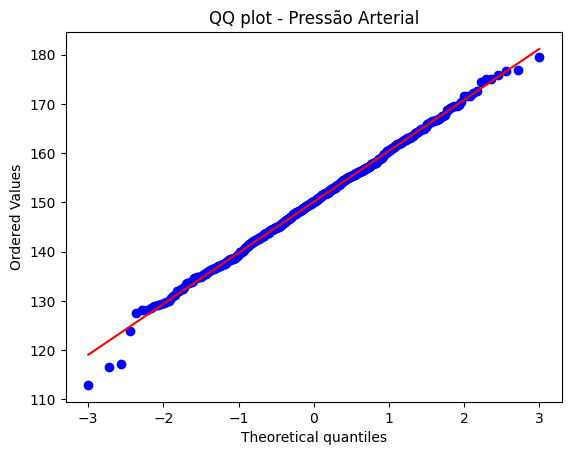

In [ ]:
# Gerar QQ plot a fim de comprovar o KSTest:
(stats.probplot(dados, dist="norm", plot=plt))
plt.title('QQ plot - Pressão Arterial')
plt.show()

Utilizando a biblioteca norm.interval:

In [ ]:
alpha = 0.05  # Nível de significância (5%)
nivel_confianca = 1 - alpha
media = saude_1['Pressao_Arterial'].mean()  # Média estimada (pode ser a média da amostra)
desvio_padrao = saude_1['Pressao_Arterial'].std()  # Desvio padrão estimado (pode ser o desvio padrão da amostra)

# Calcule o intervalo de confiança para a média populacional
intervalo_confianca_min, intervalo_confianca_max = stats.norm.interval(confidence=nivel_confianca, loc=media, scale=desvio_padrao)

print("Intervalo de Confiança para a Média (95%):")
print("Intervalo de confiança mínimo:", intervalo_confianca_min)
print("Intervalo de confiança máximo: ", intervalo_confianca_max)

Intervalo de Confiança para a Média (95%):
Intervalo de confiança mínimo: 129.8705879067565
Intervalo de confiança máximo:  170.3663159835586


Existe uma grande diferença entre os intervalos de confiança gerados pelas diferentes amostragens, indicando que a utilização do teste T-student é mais preciso e gera um intervalo mais estreito em comparação a outros testes.

### 9.	A distribuição da pressão arterial na população segue uma distribuição normal?

* a.	Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.
* b.	Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.


Comparar uma distribuição com a distribuição normal = teste KS e QQPLOT, de forma visual e calculada, ambos complementam-se.

In [ ]:
pressao_arterial = df['Pressao_Arterial']

# Realiza o teste de KS
ks_statistic, p_value = stats.kstest(pressao_arterial, 'norm', args=(pressao_arterial.mean(), pressao_arterial.std()))

print("KS statistic:", ks_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
  print("Rejeitamos a hipótese Nula (H0): A distribuição da pressão arterial na população NÃO segue uma distribuição normal.")
else:
  print("Não há evidências para rejeitar a hipótese nula, portanto, a distribuição da pressão arterial pode seguir uma distribuição normal.")

KS statistic: 0.02051963188317471
P-value: 0.7856894546948019
Não há evidências para rejeitar a hipótese nula, portanto, a distribuição da pressão arterial pode seguir uma distribuição normal.


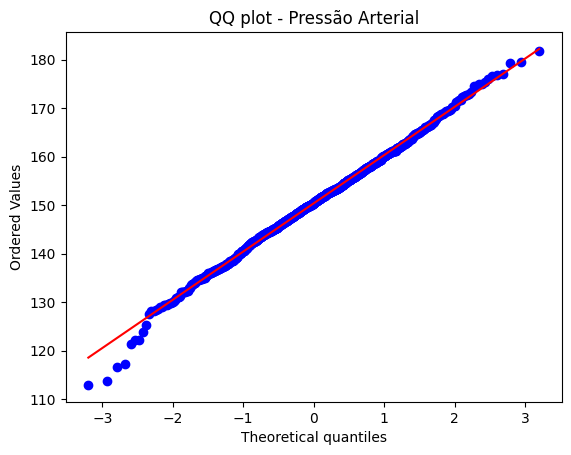

In [ ]:
# Gerar QQ plot
(stats.probplot(pressao_arterial, dist="norm", plot=plt))
plt.title('QQ plot - Pressão Arterial')
plt.show()

Ao observar o gráfico QQPlot, os pontos (em azul) aproximam-se bastante de uma reta de 45 graus (indicada em vermelho), indicando uma distribuição normal.